### Sensor Constants

In [39]:
sensor_name = 'alpha_co_conc'

## Upload Data from File

In [40]:
import pandas as pd

directory_path = 'input/'
file_name = sensor_name + '_and_temp_valid.csv'
df = pd.read_csv(directory_path + file_name)
df.head()

DateTime  measuring  Hour  temperature  raw measuring  Trend  \
0  2022-11-27 17:00:00   0.050400    17       29.265       0.100800    NaN   
1  2022-11-27 17:30:00   0.076362    17       30.005       0.093670    NaN   
2  2022-11-27 17:45:00   0.086659    17       30.085       0.093095    NaN   
3  2022-11-27 18:00:00   0.090634    18       30.120       0.093095    NaN   
4  2022-11-27 18:15:00   0.090687    18       30.135       0.090720    NaN   

   Seasonal Component  Residuals  
0           -0.001179        NaN  
1           -0.001406        NaN  
2           -0.001384        NaN  
3           -0.001746        NaN  
4           -0.002195        NaN

### Create Sensor Dataframe as Pandas Series

In [41]:
# Remove the first column with the indexes and save data into web dataframe
dataframe = df.drop(df.columns[0], axis='columns')
dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))

# Resample data with 15 mins period and create sensor dataframe
sensor_dataframe = dataframe.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_dataframe.index = sensor_dataframe['DateTime']
sensor_dataframe = sensor_dataframe.drop(columns=['DateTime'])
sensor_dataframe = sensor_dataframe[['measuring', 'raw measuring', 'temperature', 'Trend', 'Hour']]
sensor_dataframe.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_99908/1795024982.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))


measuring  raw measuring  temperature  Trend  Hour
DateTime                                                               
2022-11-27 17:00:00   0.050400       0.100800       29.265    NaN    17
2022-11-27 17:30:00   0.076362       0.093670       30.005    NaN    17
2022-11-27 17:45:00   0.086659       0.093095       30.085    NaN    17
2022-11-27 18:00:00   0.090634       0.093095       30.120    NaN    18
2022-11-27 18:15:00   0.090687       0.090720       30.135    NaN    18

### Plot raw data

<Axes: xlabel='DateTime'>

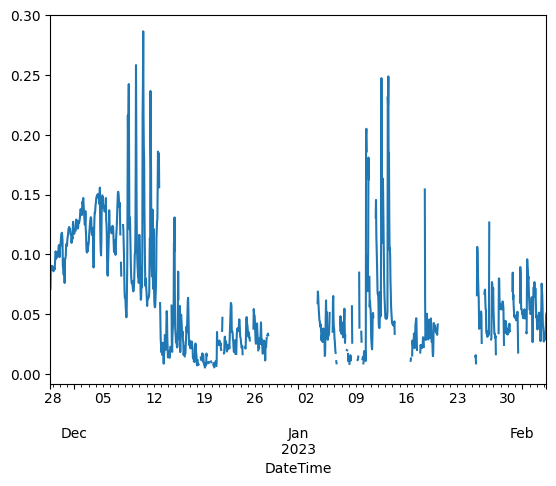

In [42]:
sensor_dataframe['measuring'].resample('1H').mean().plot()

## Compare with original data

In [43]:
input_data_directory = 'input/'
reference_data_path = input_data_directory + 'ref_air_quality_data_Vila_Moema.csv'
reference_column_name = 'Monóxido de Carbono'

## Load reference and sensor data

In [44]:
import pandas as pd

reference_data = pd.read_csv(reference_data_path)
reference_data['DateTime'] = (pd.to_datetime(reference_data['DateTime'], infer_datetime_format=True))
reference_data = reference_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
reference_data.index = reference_data['DateTime']
reference_data = reference_data.drop(columns='DateTime')[reference_column_name]

sensor_data = sensor_dataframe
reference_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_99908/1347629147.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  reference_data['DateTime'] = (pd.to_datetime(reference_data['DateTime'], infer_datetime_format=True))


DateTime
2022-01-01 02:30:00    0.1467
2022-01-01 03:30:00    0.1544
2022-01-01 04:30:00    0.1167
2022-01-01 05:30:00    0.1079
2022-01-01 06:30:00    0.1154
Name: Monóxido de Carbono, dtype: float64

## Merge sensor and reference data

In [45]:
merged_data = pd.concat([sensor_data, reference_data], axis=1, join='inner')
sensor_data = merged_data.rename(columns={'Monóxido de Carbono': 'reference'})
sensor_data.head()

measuring  raw measuring  temperature  Trend  Hour  \
DateTime                                                                  
2022-11-27 17:30:00   0.076362       0.093670       30.005    NaN    17   
2022-11-27 18:30:00   0.090958       0.091125       30.135    NaN    18   
2022-11-27 19:30:00   0.088182       0.087020       30.085    NaN    19   
2022-11-27 20:30:00   0.087247       0.087180       30.035    NaN    20   
2022-11-27 21:30:00   0.091103       0.092245       29.960    NaN    21   

                     reference  
DateTime                        
2022-11-27 17:30:00     0.0011  
2022-11-27 18:30:00     0.0095  
2022-11-27 19:30:00     0.0178  
2022-11-27 20:30:00     0.0133  
2022-11-27 21:30:00     0.0262

### Plot reference and sensor data

<Axes: xlabel='DateTime'>

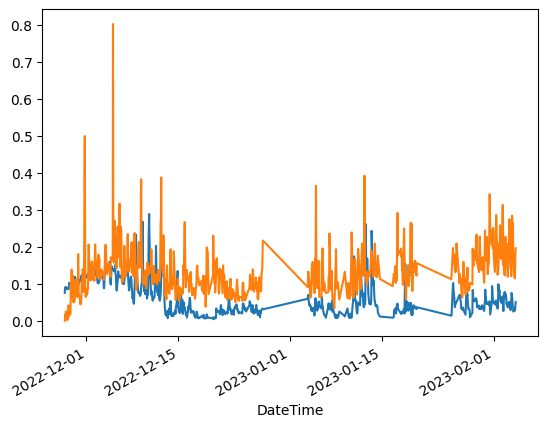

In [46]:
sensor_data['measuring'].plot()
sensor_data['reference'].plot()

<Axes: >

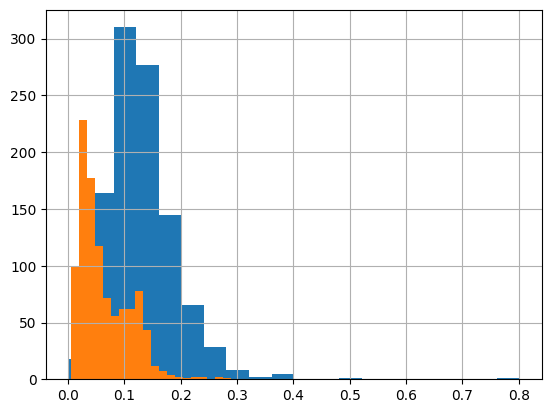

In [47]:
sensor_data['reference'].hist(bins=20)
sensor_data['measuring'].hist(bins=20)

## Plot sensor vs. reference

Spearmans correlation coefficient: 0.309
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.309
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=0.207, p<0.05")

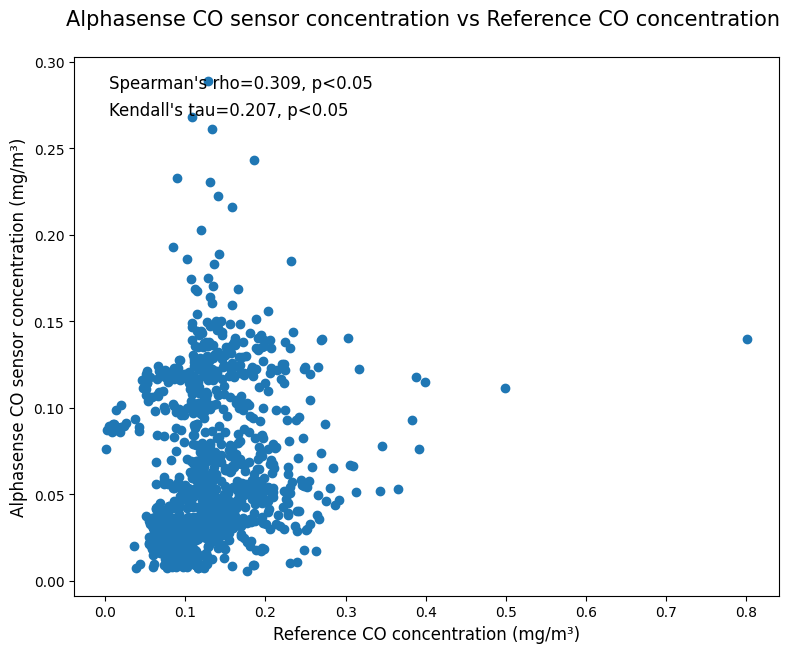

In [48]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))

plt.scatter(sensor_data['reference'], sensor_data['measuring'])
plt.title('Alphasense CO sensor concentration vs Reference CO concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Reference CO concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
plt.ylabel('Alphasense CO sensor concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(sensor_data['reference'], sensor_data['measuring'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau(sensor_data['reference'], sensor_data['measuring'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

Spearmans correlation coefficient: 0.314
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.314
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=0.205, p<0.05")

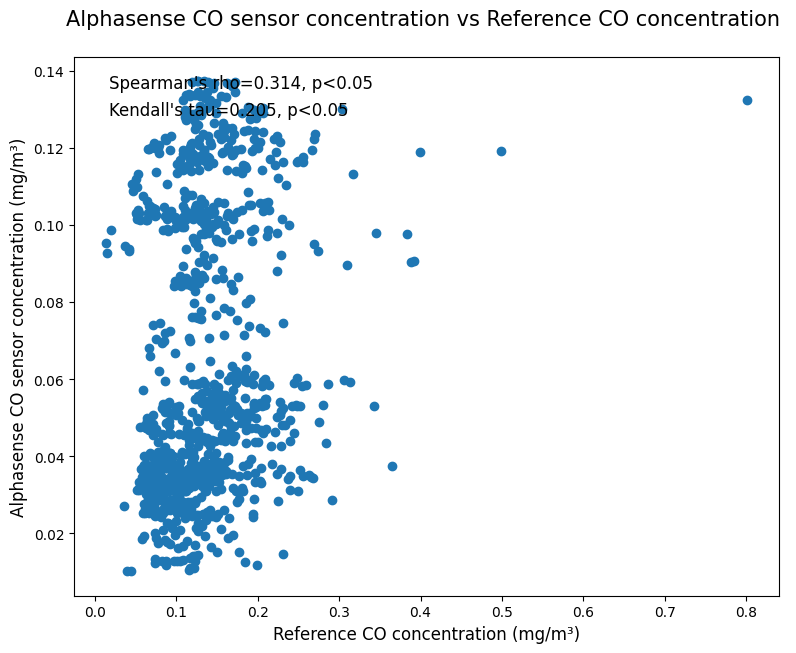

In [49]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))

plt.scatter(sensor_data['reference'], sensor_data['Trend'])
plt.title('Alphasense CO sensor concentration vs Reference CO concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Reference CO concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
plt.ylabel('Alphasense CO sensor concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(sensor_data['reference'], sensor_data['Trend'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau(sensor_data['reference'], sensor_data['Trend'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

## Calibrate data

### Prepare training and test sets

#### Separate between high and low concentrations

In [50]:
sensor_data['Concentration tag'] = sensor_data['reference'].apply(lambda value: 'LOW' if value < 0.15 else 'HIGH')
sensor_data

measuring  raw measuring  temperature  Trend  Hour  \
DateTime                                                                  
2022-11-27 17:30:00   0.076362       0.093670       30.005    NaN    17   
2022-11-27 18:30:00   0.090958       0.091125       30.135    NaN    18   
2022-11-27 19:30:00   0.088182       0.087020       30.085    NaN    19   
2022-11-27 20:30:00   0.087247       0.087180       30.035    NaN    20   
2022-11-27 21:30:00   0.091103       0.092245       29.960    NaN    21   
...                        ...            ...          ...    ...   ...   
2023-02-04 03:30:00   0.030101       0.028835       27.140    NaN     3   
2023-02-04 04:30:00   0.028371       0.028260       27.305    NaN     4   
2023-02-04 05:30:00   0.032874       0.033090       27.315    NaN     5   
2023-02-04 06:30:00   0.044563       0.045705       27.220    NaN     6   
2023-02-04 07:30:00   0.051276       0.052830       28.060    NaN     7   

                     reference Concentration tag  
DateTime                                          
2022-11-27 17:30:00     0.0011               LOW  
2022-11-27 18:30:00     0.0095               LOW  
2022-11-27 19:30:00     0.0178               LOW  
2022-11-27 20:30:00     0.0133               LOW  
2022-11-27 21:30:00     0.0262               LOW  
...                        ...               ...  
2023-02-04 03:30:00     0.1174               LOW  
2023-02-04 04:30:00     0.1153               LOW  
2023-02-04 05:30:00     0.1395               LOW  
2023-02-04 06:30:00     0.1864              HIGH  
2023-02-04 07:30:00     0.1965              HIGH  

[1027 rows x 7 columns]

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

reference_median = sensor_data['reference'].median()
sensor_median = sensor_data['measuring'].median()
temperature_mean = sensor_data['temperature'].mean()

y = sensor_data['reference'].fillna(value=reference_median).values.reshape(-1,1)
X = (sensor_data[['measuring','temperature']].fillna(value={'measuring': sensor_median,
                                                        'temperature': temperature_mean}).values.reshape(-1,2))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

low_concentration_data = sensor_data[sensor_data['Concentration tag'] == 'LOW']
reference_median = low_concentration_data['reference'].median()
sensor_median = low_concentration_data['measuring'].median()

y_low = low_concentration_data['reference'].fillna(value=reference_median).values.reshape(-1,1)
X_low = low_concentration_data[['measuring','temperature']].fillna(value={'measuring': sensor_median,
                                                                      'temperature': temperature_mean}).values.reshape(-1,2)
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, random_state=42)

high_concentration_data = sensor_data[sensor_data['Concentration tag'] == 'HIGH']
reference_median = high_concentration_data['reference'].median()
sensor_median = high_concentration_data['measuring'].median()

y_high = high_concentration_data['reference'].fillna(value=reference_median).values.reshape(-1,1)
X_high = high_concentration_data[['measuring','temperature']].fillna(value={'measuring': sensor_median,
                                                                      'temperature': temperature_mean}).values.reshape(-1,2)
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, random_state=42)

### Grid search with different models and variables combinations

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import  MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# Define different subsets of input variables
feature_subsets = {
    'CO': [0],
    'CO and temperature': [0, 1]
}
    
models = {
    'MLP Regression': (
        ('mlp_regressor', MLPRegressor(solver="lbfgs", max_iter=1000, random_state=42)), {
            'mlp_regressor__hidden_layer_sizes': [
                (4,),   (10,),   (50,),   (100,),  (200,),
                (4,4),  (4,10),  (4,50),  (4,100), (4,200),
                (10,4), (10,10), (10,50), (10,100),(10,200),
                (50,4), (50,10), (50,50), (50,100),(50,200), 
                (100,4),(100,10),(100,50),(100,100),(100,200),
                (200,4),(200,10),(200,50),(200,100),(200,200)],
            'mlp_regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
        }
    ),
    'Multilinear Regression': (
        ('linear_regressor', LinearRegression()), { }
    ),
    'KNN Regression': (
        ('knn_regressor', KNeighborsRegressor()), {
            'knn_regressor__n_neighbors': [3, 5, 7], #[3, 5, 7, 9, 11, 13, 15, 17, 20],
            'knn_regressor__weights': ['uniform', 'distance'],
            'knn_regressor__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance'
        }
    ),
    'Random Forests Regression': (
        ('random_forest_regressor', RandomForestRegressor()), {
            'random_forest_regressor__n_estimators': [50, 100, 150],
            'random_forest_regressor__max_depth': [None, 10, 20, 30],
            'random_forest_regressor__min_samples_split': [2, 5, 10],
            'random_forest_regressor__min_samples_leaf': [1, 2, 4]
        }
    )
}

# Perform grid search for each feature subset
results = {}
rmse_by_features = {}
r2_by_features = {}
mae_by_features = {}
for features_set, subset in feature_subsets.items():
    X_subset = X[:, subset]
    X_train_subset = X_train[:, subset]
    X_test_subset = X_test[:, subset]

    model_results = {}
    model_rmse = {}
    model_r2 = {}
    model_mae = {}
    for model_name, (model, param_grid) in models.items():
        print(f"Grid search for features: {features_set} with model: {model_name}...")
        
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            model
        ])
        
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_subset, y_train)

        # Print the best parameters and best score
        best_params = grid_search.best_params_

        # Evaluate the best model on the test set
        best_model = grid_search.best_estimator_
        cross_validation = cross_validate(best_model, X_subset, y, cv=10, scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'])
        y_pred = best_model.predict(X_test_subset)

        # Evaluate the model
        r2 = cross_validation['test_r2']
        rmse = cross_validation['test_neg_root_mean_squared_error']
        mae = cross_validation['test_neg_mean_absolute_error']

        model_results[model_name] = {
            'Best Model': best_model,
            'Best Parameters': best_params,
            'Test R2': r2,
            'Test RMSE': rmse,
            'Test MAE': mae
        }
        model_rmse[model_name] = {
            'Mean': rmse.mean(),
            'Std': rmse.std()
        }
        model_r2[model_name] = {
            'Mean': r2.mean(),
            'Std': r2.std()
        }
        model_mae[model_name] = {
            'Mean': mae.mean(),
            'Std': mae.std()
        }

    results[features_set] = model_results
    rmse_by_features[features_set] = model_rmse
    r2_by_features[features_set] = model_r2
    mae_by_features[features_set] = model_mae

for feature_set, models in results.items():
    for model_name, result in models.items():
        print(f"\nResults for features: {feature_set} with model: {model_name}:")
        print(f"Best Parameters: {result['Best Parameters']}")
        print(f"Test RMSE: {result['Test RMSE'].mean()} +/- {result['Test RMSE'].std()}")
        print(f"Test R2: {result['Test R2'].mean()} +/- {result['Test R2'].std()}")
        print(f"Test MAE: {result['Test MAE'].mean()} +/- {result['Test MAE'].std()}")

Grid search for features: CO with model: MLP Regression...


/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Grid search for features: CO with model: Multilinear Regression...
Grid search for features: CO with model: KNN Regression...
Grid search for features: CO with model: Random Forests Regression...


/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Fernando/Docume

Grid search for features: CO and temperature with model: MLP Regression...


/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Grid search for features: CO and temperature with model: Multilinear Regression...
Grid search for features: CO and temperature with model: KNN Regression...
Grid search for features: CO and temperature with model: Random Forests Regression...


/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Fernando/Docume


Results for features: CO with model: MLP Regression:
Best Parameters: {'mlp_regressor__alpha': 0.001, 'mlp_regressor__hidden_layer_sizes': (50, 10)}
Test RMSE: -0.05976319533377642 +/- 0.017523794183440505
Test R2: -0.45203146178919973 +/- 0.5124565434206068
Test MAE: -0.04439047942677861 +/- 0.013324867775382098

Results for features: CO with model: Multilinear Regression:
Best Parameters: {}
Test RMSE: -0.060335483958849745 +/- 0.01676564564555889
Test R2: -0.51703261139277 +/- 0.6228999884182366
Test MAE: -0.045383110953946926 +/- 0.013461057173805786

Results for features: CO with model: KNN Regression:
Best Parameters: {'knn_regressor__n_neighbors': 7, 'knn_regressor__p': 1, 'knn_regressor__weights': 'uniform'}
Test RMSE: -0.06160396110087659 +/- 0.017063728880564268
Test R2: -0.5485824452399594 +/- 0.5442191543160408
Test MAE: -0.04610914830980936 +/- 0.012591258155573822

Results for features: CO with model: Random Forests Regression:
Best Parameters: {'random_forest_regressor_

# Save Results

In [55]:
output_directory_path = 'output/'
rmse_file_name = output_directory_path + sensor_name + '_rmse.csv'
r2_file_name = output_directory_path + sensor_name + '_r2.csv'
mae_file_name = output_directory_path + sensor_name + '_mae.csv'
results_file_name = output_directory_path + sensor_name + '_results.csv'

pd.DataFrame(rmse_by_features).transpose().to_csv(rmse_file_name)
pd.DataFrame(r2_by_features).transpose().to_csv(r2_file_name)
pd.DataFrame(mae_by_features).transpose().to_csv(mae_file_name)
pd.DataFrame(results).transpose().to_csv(results_file_name)

### Multi-layer Perceptron regressor all data

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Best Parameters: {'mlp_regressor__alpha': 0.01, 'mlp_regressor__hidden_layer_sizes': (10, 50)}
Best R2: 0.1426225321763157


/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Root Mean Squared Error: -0.06282039751919902 +/- 0.0175400269309172
Mean Absolute Error: -0.047488525032180914 +/- 0.013952908438656451
R2: -0.5712512640891744 +/- 0.3839758092520428
Root Mean Squared Error (RMSE) on Test Set: 0.055386828100929104


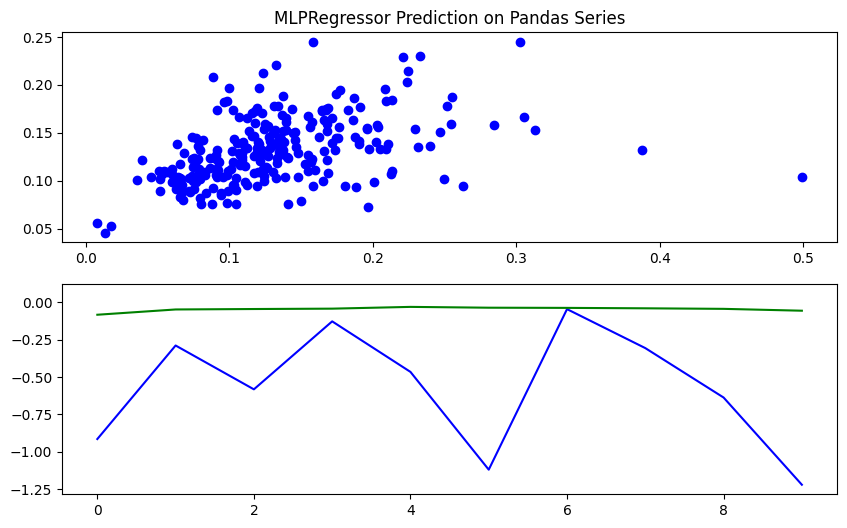

In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# Create a pipeline with StandardScaler and MLPRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp_regressor', MLPRegressor(solver="lbfgs", max_iter=1000, random_state=42))
])

# Define the parameter grid to search
param_grid = {
    'mlp_regressor__hidden_layer_sizes': [(4,),   (10,),   (50,),   (100,),  (200,),
                                          (4,4),  (4,10),  (4,50),  (4,100), (4,200),
                                          (10,4), (10,10), (10,50), (10,100),(10,200),
                                          (50,4), (50,10), (50,50), (50,100),(50,200),  
                                          (100,4),(100,10),(100,50),(100,100),(100,200),
                                          (200,4),(200,10),(200,50),(200,100),(200,200)],
    'mlp_regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R2:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
cross_validation = cross_validate(best_model, X, y, cv=10, scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'])
y_pred = best_model.predict(X_test)

# Evaluate the model
r2 = cross_validation['test_r2']
rmse = cross_validation['test_neg_root_mean_squared_error']
mae = cross_validation['test_neg_mean_absolute_error']

print(f'Root Mean Squared Error: {rmse.mean()} +/- {rmse.std()}')
print(f'Mean Absolute Error: {mae.mean()} +/- {mae.std()}')
print(f'R2: {r2.mean()} +/- {r2.std()}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)

# Plot the results
plt.figure(figsize=(10, 6))
ax = plt.subplot(2,1,1)
ax.scatter(y_test, y_pred, color='blue', label='MLPRegressor Prediction')
plt.title('MLPRegressor Prediction on Pandas Series')

ax = plt.subplot(2,1,2)
ax.plot(r2, color='blue')
ax.plot(rmse, color='red')
ax.plot(mae, color='green')

plt.show()

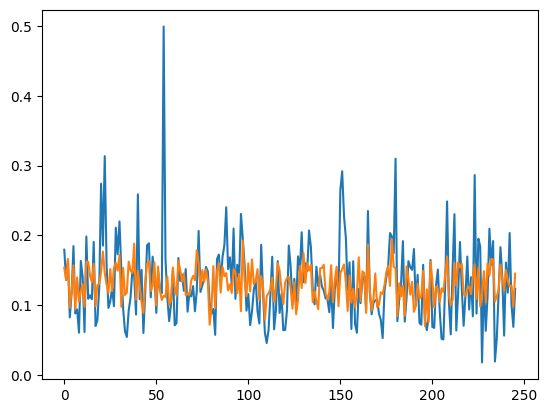

In [34]:
plt.plot(y_test)
plt.plot(y_pred)

(array([[  0.,   2.,  71., ...,   0.,   0.,   1.],
        [  0.,  39., 114., ...,   0.,   1.,   0.],
        [  2.,  71., 115., ...,   0.,   1.,   0.],
        ...,
        [  0.,  44., 114., ...,   0.,   1.,   0.],
        [  0.,   2.,  53., ...,   0.,   0.,   1.],
        [  0.,   3.,  93., ...,   0.,   1.,   0.]]),
 array([-0.20576974, -0.14046208, -0.07515441, -0.00984675,  0.05546091,
         0.12076857,  0.18607623,  0.25138389,  0.31669155,  0.38199921,
         0.44730687]),
 <a list of 246 BarContainer objects>)

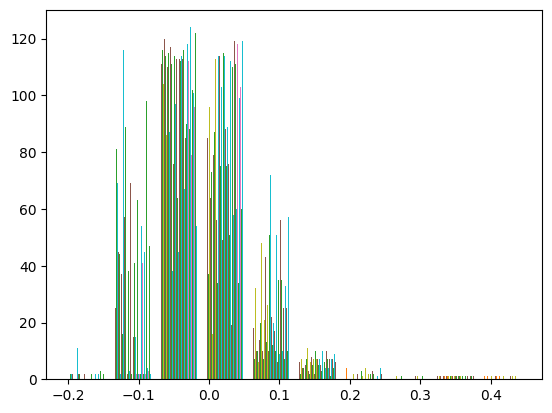

In [26]:
residuals = y_test - y_pred
plt.hist(residuals)

### Multi-layer Perceptron regressor low concentrations

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Best Parameters: {'mlp_regressor__alpha': 0.001, 'mlp_regressor__hidden_layer_sizes': (100, 100)}
Best Negative Mean Squared Error: 0.27917600721398805


/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

<bound method Pipeline.score of Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp_regressor',
                 MLPRegressor(alpha=0.001, hidden_layer_sizes=(100, 100),
                              max_iter=500, random_state=42, solver='lbfgs'))])>
Root Mean Squared Error: -0.03077391526646982 +/- 0.01263692234336508
Mean Absolute Error: -0.02572933722620584 +/- 0.01026318500881405
R2: -1.0777231459359653 +/- 1.06567084614602
Root Mean Squared Error (RMSE) on Test Set: 0.024459291455275246


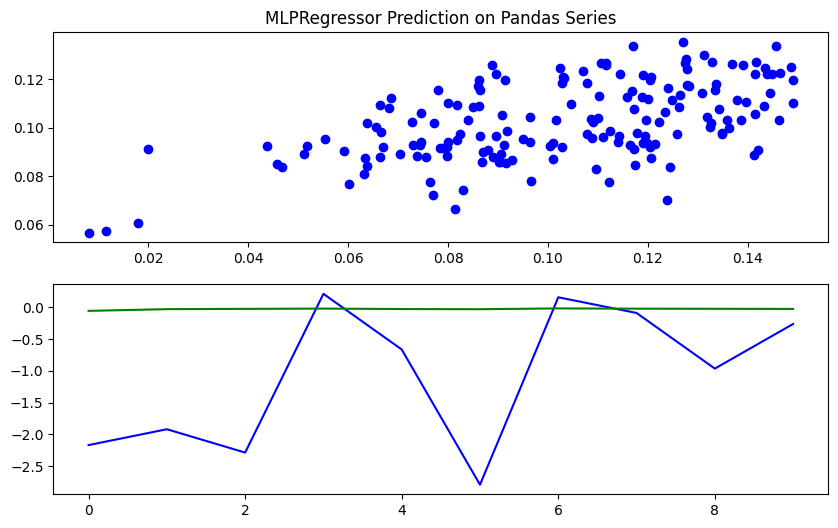

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import numpy as np

# Create a pipeline with StandardScaler and MLPRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp_regressor', MLPRegressor(solver="lbfgs", max_iter=500, random_state=42))
])

# Define the parameter grid to search
param_grid = {
    'mlp_regressor__hidden_layer_sizes': [(4,),   (10,),   (50,),   (100,),  (200,),
                                          (4,4),  (4,10),  (4,50),  (4,100), (4,200),
                                          (10,4), (10,10), (10,50), (10,100),(10,200),
                                          (50,4), (50,10), (50,50), (50,100),(50,200),  
                                          (100,4),(100,10),(100,50),(100,100),(100,200),
                                          (200,4),(200,10),(200,50),(200,100),(200,200)],
    'mlp_regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_low, y_train_low)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
cross_validation = cross_validate(best_model, X_low, y_low, cv=10, scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'])
y_pred_low = best_model.predict(X_test_low)

# Evaluate the model
r2 = cross_validation['test_r2']
rmse = cross_validation['test_neg_root_mean_squared_error']
mae = cross_validation['test_neg_mean_absolute_error']

print(f'Root Mean Squared Error: {rmse.mean()} +/- {rmse.std()}')
print(f'Mean Absolute Error: {mae.mean()} +/- {mae.std()}')
print(f'R2: {r2.mean()} +/- {r2.std()}')
rmse = np.sqrt(mean_squared_error(y_test_low, y_pred_low))
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)

# Plot the results
plt.figure(figsize=(10, 6))
ax = plt.subplot(2,1,1)
ax.scatter(y_test_low, y_pred_low, color='blue', label='MLPRegressor Prediction')
plt.title('MLPRegressor Prediction on Pandas Series')

ax = plt.subplot(2,1,2)
ax.plot(r2, color='blue')
ax.plot(rmse, color='red')
ax.plot(mae, color='green')

plt.show()

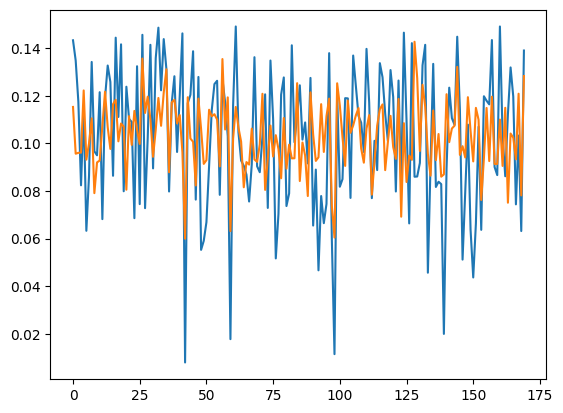

In [44]:
plt.plot(y_test_low)
plt.plot(y_pred_low)

(array([[ 0.,  4.,  3., ..., 20.,  0.,  0.],
        [ 0.,  0.,  4., ..., 46., 16.,  0.],
        [ 0.,  0.,  4., ..., 45., 16.,  0.],
        ...,
        [ 1.,  3.,  5., ..., 11.,  0.,  0.],
        [ 0.,  0.,  1., ..., 49., 42.,  6.],
        [ 2.,  2.,  8., ...,  0.,  0.,  0.]]),
 array([-0.13468234, -0.11230117, -0.08991999, -0.06753882, -0.04515765,
        -0.02277647, -0.0003953 ,  0.02198588,  0.04436705,  0.06674823,
         0.0891294 ]),
 <a list of 170 BarContainer objects>)

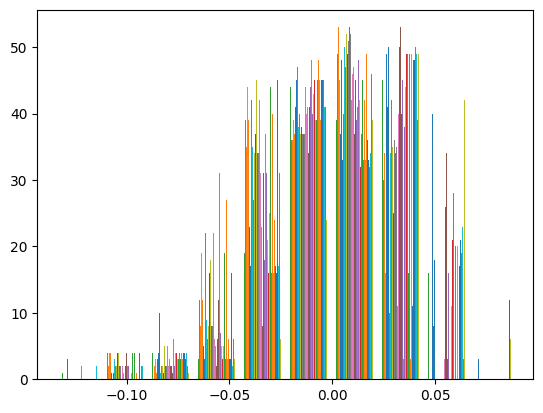

In [45]:
residuals = y_test_low - y_pred_low
plt.hist(residuals)

### Multilinear Regression all data

Root Mean Squared Error: -0.06272314139142318 +/- 0.013571410903906107
Mean Absolute Error: -0.04751800992315597 +/- 0.008964964646677776
R2: -0.47992501961157596 +/- 0.5877824883332958
Root Mean Squared Error (RMSE) on Test Set: 0.05698554547316403


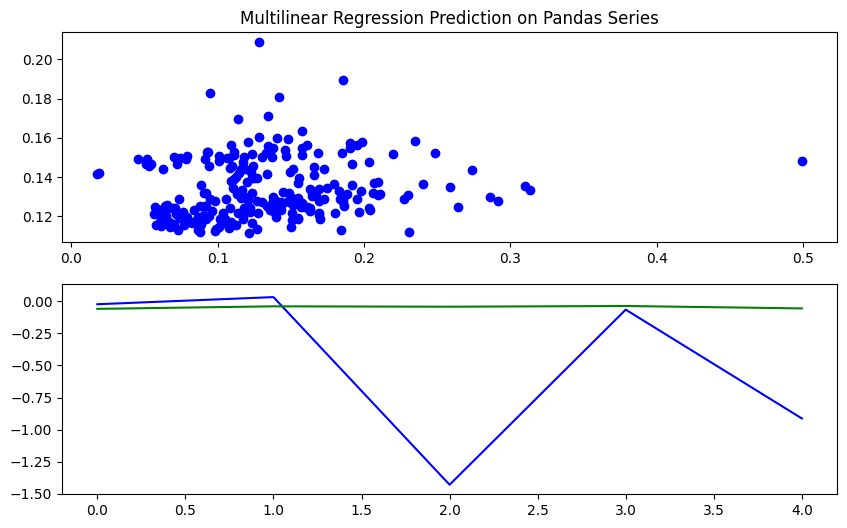

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

linear = make_pipeline(
    LinearRegression()
)
regr = linear.fit(X_train, y_train)
y_pred = regr.predict(X_test)

cross_validation = cross_validate(linear, X, y, cv=5, scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'])

# Evaluate the model
r2 = cross_validation['test_r2']
rmse = cross_validation['test_neg_root_mean_squared_error']
mae = cross_validation['test_neg_mean_absolute_error']

print(f'Root Mean Squared Error: {rmse.mean()} +/- {rmse.std()}')
print(f'Mean Absolute Error: {mae.mean()} +/- {mae.std()}')
print(f'R2: {r2.mean()} +/- {r2.std()}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)

# Plot the results
plt.figure(figsize=(10, 6))
ax = plt.subplot(2,1,1)
ax.scatter(y_test, y_pred, color='blue', label='Multilinear Regression Prediction')
plt.title('Multilinear Regression Prediction on Pandas Series')

ax = plt.subplot(2,1,2)
ax.plot(r2, color='blue')
ax.plot(rmse, color='red')
ax.plot(mae, color='green')

plt.show()

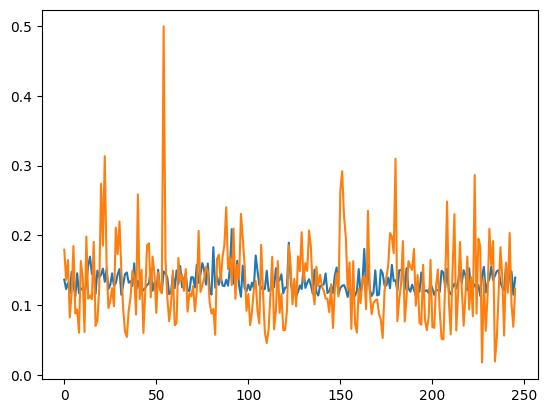

In [48]:
plt.plot(y_pred)
plt.plot(y_test)

(array([ 5., 29., 86., 78., 37., 11., 13.,  1.,  1.,  2.]),
 array([-0.13558442, -0.09659696, -0.05760949, -0.01862203,  0.02036543,
         0.05935289,  0.09834035,  0.13732782,  0.17631528,  0.21530274,
         0.2542902 ]),
 <BarContainer object of 10 artists>)

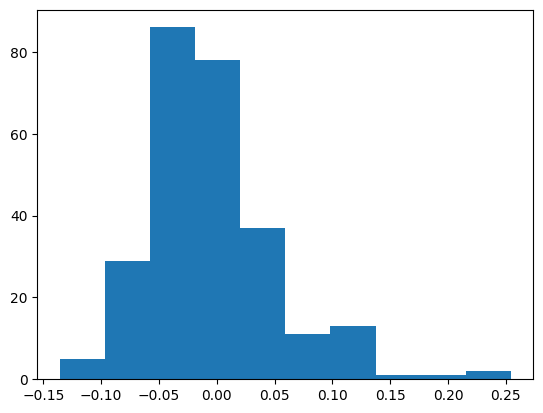

In [347]:
residuals = y_test - y_pred
plt.hist(residuals)

### Multilinear Regression high concentration data

Root Mean Squared Error: -0.05524726170600406 +/- 0.020975338379497097
Mean Absolute Error: -0.03623055482222398 +/- 0.005053825843523364
R2: -0.11415732299192968 +/- 0.13192570260623285
Root Mean Squared Error (RMSE) on Test Set: 0.060739897429030645


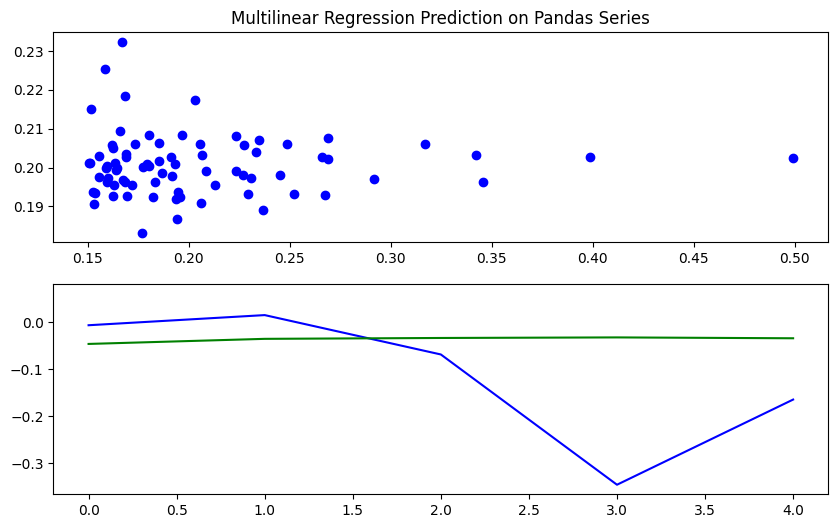

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

linear = make_pipeline(
    LinearRegression()
)
regr = linear.fit(X_train_high, y_train_high)
y_pred_high = regr.predict(X_test_high)

cross_validation = cross_validate(linear, X_high, y_high, cv=5, scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'])

# Evaluate the model
r2 = cross_validation['test_r2']
rmse = cross_validation['test_neg_root_mean_squared_error']
mae = cross_validation['test_neg_mean_absolute_error']

print(f'Root Mean Squared Error: {rmse.mean()} +/- {rmse.std()}')
print(f'Mean Absolute Error: {mae.mean()} +/- {mae.std()}')
print(f'R2: {r2.mean()} +/- {r2.std()}')
rmse = np.sqrt(mean_squared_error(y_test_high, y_pred_high))
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)

# Plot the results
plt.figure(figsize=(10, 6))
ax = plt.subplot(2,1,1)
ax.scatter(y_test_high, y_pred_high, color='blue', label='Multilinear Regression Prediction')
plt.title('Multilinear Regression Prediction on Pandas Series')

ax = plt.subplot(2,1,2)
ax.plot(r2, color='blue')
ax.plot(rmse, color='red')
ax.plot(mae, color='green')

plt.show()

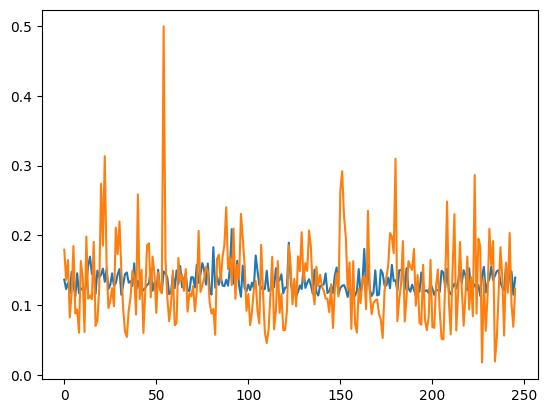

In [ ]:
plt.plot(y_pred)
plt.plot(y_test)

(array([ 5., 29., 86., 78., 37., 11., 13.,  1.,  1.,  2.]),
 array([-0.13558442, -0.09659696, -0.05760949, -0.01862203,  0.02036543,
         0.05935289,  0.09834035,  0.13732782,  0.17631528,  0.21530274,
         0.2542902 ]),
 <BarContainer object of 10 artists>)

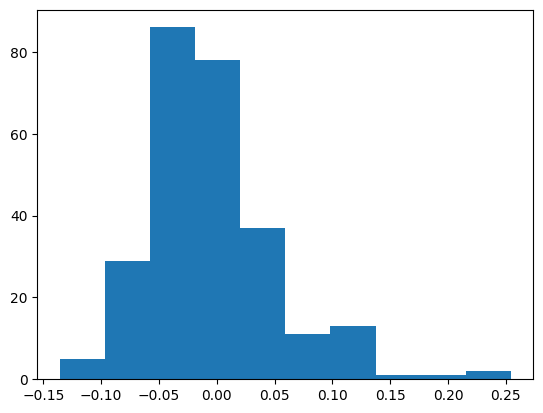

In [ ]:
residuals = y_test - y_pred
plt.hist(residuals)

## K-Nearest Neighbours

### K-Nearest Neighbours on all data

Best Parameters: {'knn_regressor__n_neighbors': 20, 'knn_regressor__p': 1, 'knn_regressor__weights': 'distance'}
Best R2: 0.15176924103862297
Root Mean Squared Error: -0.06050503657557047 +/- 0.01635575252197667
Mean Absolute Error: -0.04473829101363241 +/- 0.011613959695764287
R2: -0.497457451411557 +/- 0.4685432711415868
Root Mean Squared Error (RMSE) on Test Set: 0.05078060559893225


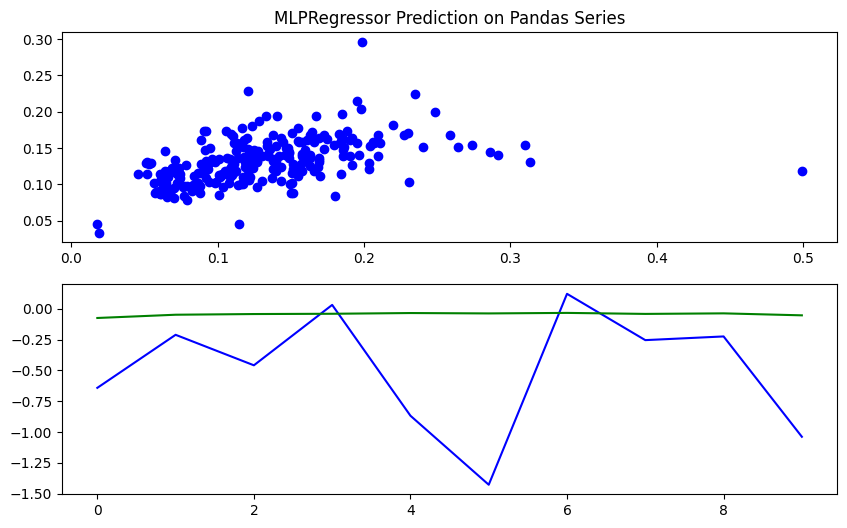

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# Create a pipeline with StandardScaler and MLPRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn_regressor', KNeighborsRegressor())
])

# Define the parameter grid to search
param_grid = {
    'knn_regressor__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 20],
    'knn_regressor__weights': ['uniform', 'distance'],
    'knn_regressor__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance'
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R2:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
cross_validation = cross_validate(best_model, X, y, cv=10, scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'])
y_pred = best_model.predict(X_test)

# Evaluate the model
r2 = cross_validation['test_r2']
rmse = cross_validation['test_neg_root_mean_squared_error']
mae = cross_validation['test_neg_mean_absolute_error']

print(f'Root Mean Squared Error: {rmse.mean()} +/- {rmse.std()}')
print(f'Mean Absolute Error: {mae.mean()} +/- {mae.std()}')
print(f'R2: {r2.mean()} +/- {r2.std()}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)

# Plot the results
plt.figure(figsize=(10, 6))
ax = plt.subplot(2,1,1)
ax.scatter(y_test, y_pred, color='blue', label='MLPRegressor Prediction')
plt.title('MLPRegressor Prediction on Pandas Series')

ax = plt.subplot(2,1,2)
ax.plot(r2, color='blue')
ax.plot(rmse, color='red')
ax.plot(mae, color='green')

plt.show()

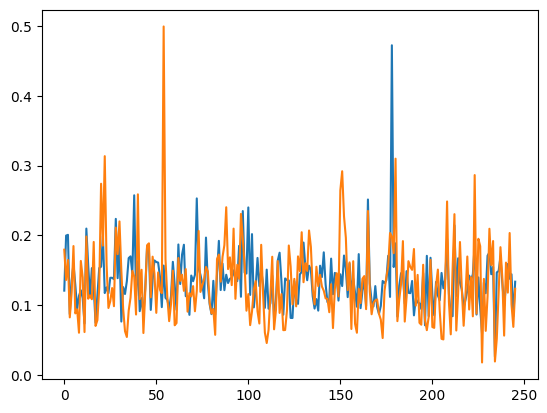

In [ ]:
plt.plot(y_pred)
plt.plot(y_test)

### K-Nearest Neighbours in low concentrations

Best Parameters: {'knn_regressor__n_neighbors': 13, 'knn_regressor__p': 1, 'knn_regressor__weights': 'uniform'}
Best R2: 0.2704789426906466
Root Mean Squared Error: -0.03219936610497103 +/- 0.009537663509037769
Mean Absolute Error: -0.025673051868610693 +/- 0.006262059685089418
R2: -0.4683810715813065 +/- 0.4664685770722663
Root Mean Squared Error (RMSE) on Test Set: 0.024531182376846945


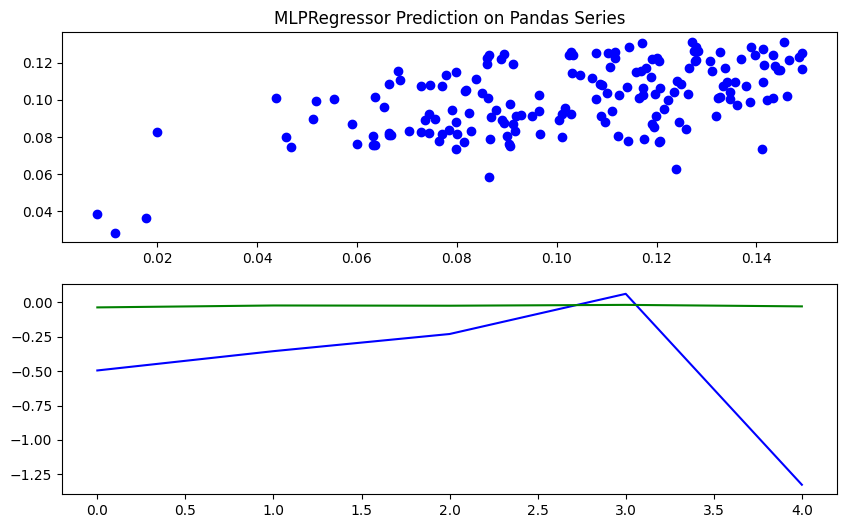

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# Create a pipeline with StandardScaler and MLPRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn_regressor', KNeighborsRegressor())
])

# Define the parameter grid to search
param_grid = {
    'knn_regressor__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 20],
    'knn_regressor__weights': ['uniform', 'distance'],
    'knn_regressor__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance'
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_low, y_train_low)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R2:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
cross_validation = cross_validate(best_model, X_low, y_low, cv=5, scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'])
y_pred_low = best_model.predict(X_test_low)

# Evaluate the model
r2 = cross_validation['test_r2']
rmse = cross_validation['test_neg_root_mean_squared_error']
mae = cross_validation['test_neg_mean_absolute_error']

print(f'Root Mean Squared Error: {rmse.mean()} +/- {rmse.std()}')
print(f'Mean Absolute Error: {mae.mean()} +/- {mae.std()}')
print(f'R2: {r2.mean()} +/- {r2.std()}')
rmse = np.sqrt(mean_squared_error(y_test_low, y_pred_low))
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)

# Plot the results
plt.figure(figsize=(10, 6))
ax = plt.subplot(2,1,1)
ax.scatter(y_test_low, y_pred_low, color='blue', label='MLPRegressor Prediction')
plt.title('MLPRegressor Prediction on Pandas Series')

ax = plt.subplot(2,1,2)
ax.plot(r2, color='blue')
ax.plot(rmse, color='red')
ax.plot(mae, color='green')

plt.show()

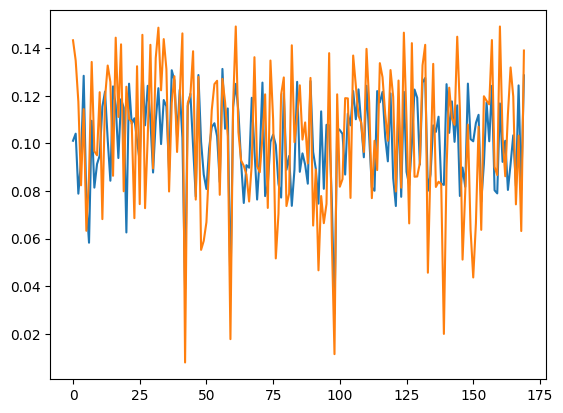

In [ ]:
plt.plot(y_pred_low)
plt.plot(y_test_low)

### Grid search with different models and variables combinations

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import  MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# Define different subsets of input variables
feature_subsets = {
    'SO2_1': [0],
    'SO2_1 and SO2_2': [0, 1],
    'SO2_1 and temperature': [0, 6],
    'SO2_1, SO2_2 and temperature': [0, 1, 6],
    'SO2_2': [1],
    'SO2_2 and temperature': [1, 6],
    'Trend 1': [2],
    'Trend 1 and 2': [2, 3],
    'Trend 1 and temperature': [2, 6],
    'Trend 1, 2 and temperature': [2, 3, 6],
    'Trend 1 and Seasonal 1': [2, 4],
    'Trend 1, Seasonal 1 and temperature': [2, 4, 6],
    'Trend 1, Seasonal 1 and Trend 2': [2, 3, 4],
    'Trend 1, Seasonal 1, Trend 2 and temperature': [2, 3, 4, 6],
    'Trend 1, Seasonal 1, Trend 2 and Seasonal 2': [2, 3, 4, 5],
    'Trend 1, Seasonal 1, Trend 2, Seasonal 2 and temperature': [2, 3, 4, 5, 6],
    'Trend 2': [3],
    'Trend 2 and temperature': [3, 6],
    'Trend 2 and Seasonal 2': [3, 5],
    'Trend 2, Seasonal 2 and temperature': [3, 5, 6],
    'Trend 2, Seasonal 2 and Trend 1': [3, 5, 2],
    'Trend 2, Seasonal 2, Trend 1 and temperature': [3, 5, 2, 6]
}
    
models = {
    # 'MLP Regression': (
    #     ('mlp_regressor', MLPRegressor(solver="lbfgs", max_iter=1000, random_state=42)), {
    #         'mlp_regressor__hidden_layer_sizes': [
    #             (4,),   (10,),   (50,),   (100,),  (200,),
    #             (4,4),  (4,10),  (4,50),  (4,100), (4,200),
    #             (10,4), (10,10), (10,50), (10,100),(10,200),
    #             (50,4), (50,10), (50,50), (50,100),(50,200), 
    #             (100,4),(100,10),(100,50),(100,100),(100,200),
    #             (200,4),(200,10),(200,50),(200,100),(200,200)],
    #         'mlp_regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
    #     }
    # ),
    'Multilinear Regression': (
        ('linear_regressor', LinearRegression()), { }
    ),
    'KNN Regression': (
        ('knn_regressor', KNeighborsRegressor()), {
            'knn_regressor__n_neighbors': [3, 5, 7], #[3, 5, 7, 9, 11, 13, 15, 17, 20],
            'knn_regressor__weights': ['uniform', 'distance'],
            'knn_regressor__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance'
        }
    ),
    # 'Random Forests Regression': (
    #     ('random_forest_regressor', RandomForestRegressor()), {
    #         'random_forest_regressor__n_estimators': [50, 100, 150],
    #         'random_forest_regressor__max_depth': [None, 10, 20, 30],
    #         'random_forest_regressor__min_samples_split': [2, 5, 10],
    #         'random_forest_regressor__min_samples_leaf': [1, 2, 4]
    #     }
    # )
}

# Perform grid search for each feature subset
results = {}
rmse_by_features = {}
r2_by_features = {}
mae_by_features = {}
for features_set, subset in feature_subsets.items():
    X_subset = X[:, subset]
    X_train_subset = X_train[:, subset]
    X_test_subset = X_test[:, subset]

    model_results = {}
    model_rmse = {}
    model_r2 = {}
    model_mae = {}
    for model_name, (model, param_grid) in models.items():
        print(f"Grid search for features: {features_set} with model: {model_name}...")
        
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            model
        ])
        
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_subset, y_train)

        # Print the best parameters and best score
        best_params = grid_search.best_params_

        # Evaluate the best model on the test set
        best_model = grid_search.best_estimator_
        cross_validation = cross_validate(best_model, X_subset, y, cv=10, scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'])
        y_pred = best_model.predict(X_test_subset)

        # Evaluate the model
        r2 = cross_validation['test_r2']
        rmse = cross_validation['test_neg_root_mean_squared_error']
        mae = cross_validation['test_neg_mean_absolute_error']

        model_results[model_name] = {
            'Best Model': best_model,
            'Best Parameters': best_params,
            'Test R2': r2,
            'Test RMSE': rmse,
            'Test MAE': mae
        }
        model_rmse[model_name] = {
            'Mean': rmse.mean(),
            'Std': rmse.std()
        }
        model_r2[model_name] = {
            'Mean': r2.mean(),
            'Std': r2.std()
        }
        model_mae[model_name] = {
            'Mean': mae.mean(),
            'Std': mae.std()
        }

    results[features_set] = model_results
    rmse_by_features[features_set] = model_rmse
    r2_by_features[features_set] = model_r2
    mae_by_features[features_set] = model_mae

for feature_set, models in results.items():
    for model_name, result in models.items():
        print(f"\nResults for features: {feature_set} with model: {model_name}:")
        print(f"Best Parameters: {result['Best Parameters']}")
        print(f"Test RMSE: {result['Test RMSE'].mean()} +/- {result['Test RMSE'].std()}")
        print(f"Test R2: {result['Test R2'].mean()} +/- {result['Test R2'].std()}")
        print(f"Test MAE: {result['Test MAE'].mean()} +/- {result['Test MAE'].std()}")

Grid search for features: SO2_1 with model: Multilinear Regression...


Grid search for features: SO2_1 with model: KNN Regression...
Grid search for features: SO2_1 and SO2_2 with model: Multilinear Regression...
Grid search for features: SO2_1 and SO2_2 with model: KNN Regression...
Grid search for features: SO2_1 and temperature with model: Multilinear Regression...
Grid search for features: SO2_1 and temperature with model: KNN Regression...
Grid search for features: SO2_1, SO2_2 and temperature with model: Multilinear Regression...
Grid search for features: SO2_1, SO2_2 and temperature with model: KNN Regression...
Grid search for features: SO2_2 with model: Multilinear Regression...
Grid search for features: SO2_2 with model: KNN Regression...
Grid search for features: SO2_2 and temperature with model: Multilinear Regression...
Grid search for features: SO2_2 and temperature with model: KNN Regression...
Grid search for features: Trend 1 with model: Multilinear Regression...
Grid search for features: Trend 1 with model: KNN Regression...
Grid search 

# Save Results

In [ ]:
output_directory_path = 'output/'
rmse_file_name = output_directory_path + sensor_name + '_rmse.csv'
r2_file_name = output_directory_path + sensor_name + '_r2.csv'
mae_file_name = output_directory_path + sensor_name + '_mae.csv'
results_file_name = output_directory_path + sensor_name + '_results.csv'

pd.DataFrame(rmse_by_features).transpose().to_csv(rmse_file_name)
pd.DataFrame(r2_by_features).transpose().to_csv(r2_file_name)
pd.DataFrame(mae_by_features).transpose().to_csv(mae_file_name)
pd.DataFrame(results).transpose().to_csv(results_file_name)